## Business Problem 
#### Create a model that can help predict a species of a penguin based on physical attributes, then we can use that model to help researchers classify penguins in the field, inseated of needing an experinced biologist

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [3]:
os.chdir("C:\\Users\\KIRTI RAJ PRADHAN\\Downloads")

In [4]:
df=pd.read_csv("penguins_size.csv")

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

## Data Preprocessing
### EDA

In [8]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [9]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [10]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

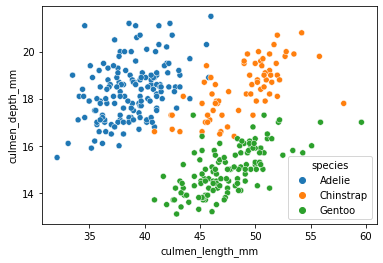

In [12]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species')
plt.show()

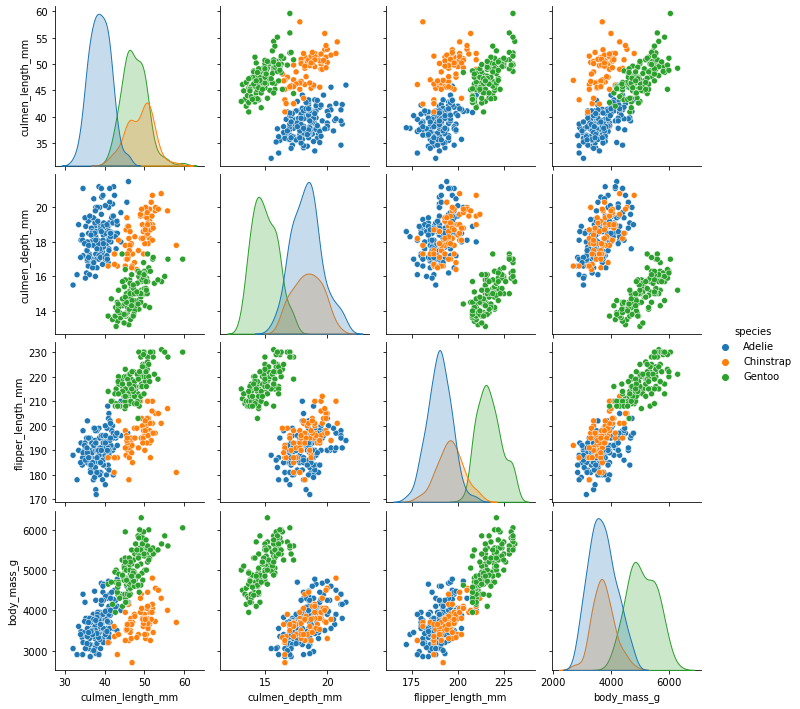

In [13]:
sns.pairplot(df,hue='species')
plt.show()

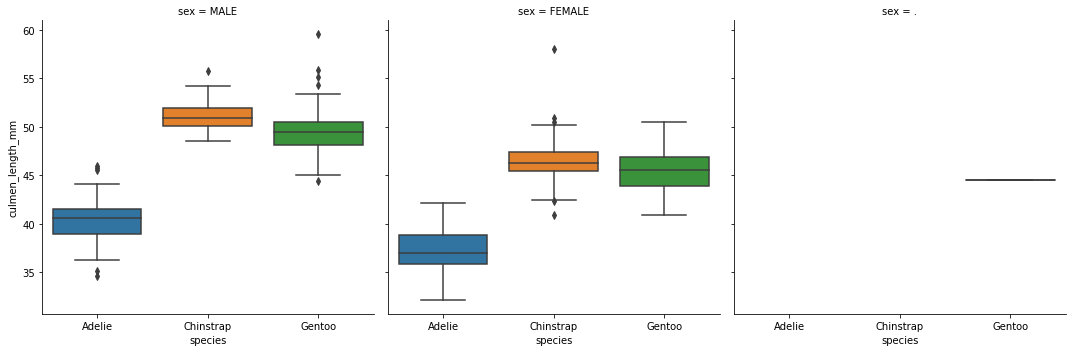

In [14]:
sns.catplot(x='species',y='culmen_length_mm',data=df,kind="box",col='sex')
plt.show()

### Feature Engineering

In [15]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [16]:
df=df.dropna()

In [17]:
df.shape

(334, 7)

In [18]:
df=df[df['sex']!='.']
df.shape

(333, 7)

## X & y

In [19]:
X=pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y=df['species']

## Train Test | Split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

## Modelling
### Random Forest Classifier with default parameters

In [21]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
ypred_train=model.predict(X_train)

In [23]:
ypred_test=model.predict(X_test)

## Evaluation

In [24]:
from sklearn.metrics import accuracy_score
print("Train accuracy: ",accuracy_score(ypred_train,y_train))
print("Test accuracy: ",accuracy_score(ypred_test,y_test))

Train accuracy:  1.0
Test accuracy:  0.99


C:\Users\KIRTI RAJ PRADHAN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


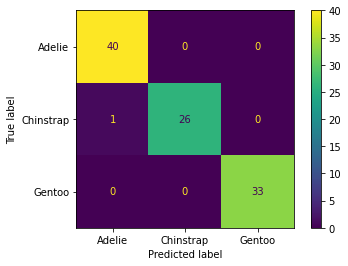

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)
plt.show()

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        40
   Chinstrap       1.00      0.96      0.98        27
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



## Feature Importance

In [27]:
model.feature_importances_

array([0.31078824, 0.15190141, 0.27504551, 0.14456004, 0.08344074,
       0.02405799, 0.01020606])

In [28]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importances'])

,Feature Importances
culmen_length_mm,0.310788
culmen_depth_mm,0.151901
flipper_length_mm,0.275046
body_mass_g,0.144560
island_Dream,0.083441
island_Torgersen,0.024058
sex_MALE,0.010206


## Hyperparameter Tuning

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
estimator=RandomForestClassifier()
param_grid={'n_estimators':list(range(1,101))}

In [31]:
grid=GridSearchCV(estimator,param_grid,scoring='accuracy',cv=5)

In [32]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [33]:
grid.best_params_

{'n_estimators': 10}

## Remodelling

In [34]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

train_pred = model.predict(X_train)
test_pred=model.predict(X_test)

print("Train accuracy: ",accuracy_score(y_train,train_pred))
print("Test accuracy: ",accuracy_score(y_test,test_pred))

Train accuracy:  1.0
Test accuracy:  0.99
